In [1]:
import spacy
import pandas as pd
import numpy as np

# 可視化用のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import neologdn
import MeCab

In [17]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500

In [2]:
def basic_check(df):
    '''
    読み込んだデータフレームの
    ・行と列の長さ
    ・各カラムの欠損値の数
    ・各カラムのデータの型
    ・先頭&末尾から5行目まで
    を確認する

    '''
    print('行と列の長さ\n{}'.format(df.shape))
    print('-'*50)
    print('各カラムの欠損値の数\n{}'.format(df.isnull().sum()))
    print('-'*50)
    print(df.info())
    print('-'*50)
    print('各カラムのデータ型\n{}'.format(df.dtypes))
    display(df.head(), df.tail())

## 形態素解析

In [4]:
# for文使っているので処理に時間がかかる
# 参考：https://qiita.com/derodero24/items/b49dd92e14c7e7655ccc
nlp = spacy.load('ja_ginza_nopn')

with open('主成分分析冒頭.txt', encoding='utf-8') as f1, open('主成分分析冒頭.txt.ginza', 'w', encoding='utf-8') as f2:
    for line in f1:
        for sent in nlp(line.strip()).sents:
            for token in sent:
                # i:トークン番号, orth_:表層形, lemma_:基本形,
                # pos_:品詞（英語）←必要ないので削る, pos_detail:品詞細分類（日本語）
                f2.write(f'{token.i}\t{token.orth_}\t{token.lemma_}\t{token._.pos_detail}\n')
            f2.write('EOS\n')

In [67]:
# すぐに処理が終わる
# 参考：https://qiita.com/Masaaki_Inaba/items/eb33cf9a3bb79102ff5c
def make_analyzed_file(input_file_name: str, output_file_name: str):
    '''
    関数内容
    ・日本語の文章ファイルを形態素解析してファイルに保存する関数
    Input
    ・param input_file_name プレーンな日本語の文章ファイル名
    ・param output_file_name 形態素解析済みの文章ファイル名
    '''
    _m = MeCab.Tagger('-Ochasen -d C:\mecab-ipadic-neologd')
    with open(input_file_name, encoding='utf-8') as input_file:
        with open(output_file_name, mode='w', encoding='utf-8') as output_file:
            output_file.write(_m.parse(input_file.read()))

make_analyzed_file('主成分分析冒頭.txt', '主成分分析冒頭.txt.mecab')

## 形態素解析して保存したテキストファイルを読み込みデータフレーム型で保存する

In [6]:
def text_to_dataframe(text, separation, col_names:list):
    '''
    関数内容
    ・txtファイルをデータフレームとして読み込む関数
    Input
    ・text：テキストファイル名
    ・separation：タブ区切り('\t')orカンマ区切り(',')を指定
    ・col_names：指定したいカラム名、リスト型で与える必要あり
    関数使用方法
    ・test_text = text_to_dataframe('neko.txt.ginza', '\t', ['index', 'surface', 'original', 'type'])
    '''
    text_df = pd.read_csv(text, sep=separation, names=col_names)
    
    return text_df

In [7]:
g_text = pd.read_csv('主成分分析冒頭.txt.ginza', sep='\t', names=['index', 'surface', 'original', 'type'])

basic_check(g_text)

行と列の長さ
(684, 4)
--------------------------------------------------
各カラムの欠損値の数
index        0
surface     20
original    20
type        20
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
index       684 non-null object
surface     664 non-null object
original    664 non-null object
type        664 non-null object
dtypes: object(4)
memory usage: 21.5+ KB
None
--------------------------------------------------
各カラムのデータ型
index       object
surface     object
original    object
type        object
dtype: object


,index,surface,original,type
0,0,﻿,﻿,"補助記号,一般,*,*"
1,1,主成分,主成分,"名詞,普通名詞,一般,*"
2,2,分析,分析,"名詞,普通名詞,サ変可能,*"
3,3,は,は,"助詞,係助詞,*,*"
4,4,相関,相関,"名詞,普通名詞,サ変可能,*"


,index,surface,original,type
679,660,は,は,"助詞,係助詞,*,*"
680,661,限ら,限る,"動詞,一般,*,*"
681,662,ない,ない,"助動詞,*,*,*"
682,663,。,。,"補助記号,句点,*,*"
683,EOS,NaN,NaN,NaN


In [8]:
# indexカラム&欠損値があるレコードを削除
g_text2 = g_text.drop(['index'], axis=1).dropna()

basic_check(g_text2)

行と列の長さ
(664, 3)
--------------------------------------------------
各カラムの欠損値の数
surface     0
original    0
type        0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 682
Data columns (total 3 columns):
surface     664 non-null object
original    664 non-null object
type        664 non-null object
dtypes: object(3)
memory usage: 20.8+ KB
None
--------------------------------------------------
各カラムのデータ型
surface     object
original    object
type        object
dtype: object


,surface,original,type
0,﻿,﻿,"補助記号,一般,*,*"
1,主成分,主成分,"名詞,普通名詞,一般,*"
2,分析,分析,"名詞,普通名詞,サ変可能,*"
3,は,は,"助詞,係助詞,*,*"
4,相関,相関,"名詞,普通名詞,サ変可能,*"


,surface,original,type
678,と,と,"助詞,格助詞,*,*"
679,は,は,"助詞,係助詞,*,*"
680,限ら,限る,"動詞,一般,*,*"
681,ない,ない,"助動詞,*,*,*"
682,。,。,"補助記号,句点,*,*"


In [9]:
m_text = pd.read_csv('主成分分析冒頭.txt.mecab', sep='\t', names=['surface', 'katakana', 'original', 'type','katsuyoukei', 'katsuyoukata'])

basic_check(m_text)

行と列の長さ
(617, 6)
--------------------------------------------------
各カラムの欠損値の数
surface           1
katakana          1
original          1
type              1
katsuyoukei     498
katsuyoukata    498
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
surface         616 non-null object
katakana        616 non-null object
original        616 non-null object
type            616 non-null object
katsuyoukei     119 non-null object
katsuyoukata    119 non-null object
dtypes: object(6)
memory usage: 29.0+ KB
None
--------------------------------------------------
各カラムのデータ型
surface         object
katakana        object
original        object
type            object
katsuyoukei     object
katsuyoukata    object
dtype: object


,surface,katakana,original,type,katsuyoukei,katsuyoukata
0,NaN,﻿,﻿,記号-一般,NaN,NaN
1,主成分分析,シュセイブンブンセキ,主成分分析,名詞-固有名詞-一般,NaN,NaN
2,は,ハ,は,助詞-係助詞,NaN,NaN
3,相関,ソウカン,相関,名詞-サ変接続,NaN,NaN
4,の,ノ,の,助詞-格助詞-一般,NaN,NaN


,surface,katakana,original,type,katsuyoukei,katsuyoukata
612,は,ハ,は,助詞-係助詞,NaN,NaN
613,限ら,カギラ,限る,動詞-自立,五段・ラ行,未然形
614,ない,ナイ,ない,助動詞,特殊・ナイ,基本形
615,。,。,。,記号-句点,NaN,NaN
616,EOS,NaN,NaN,NaN,NaN,NaN


In [10]:
m_text2 = m_text[m_text['surface']!='EOS'].dropna(subset=['surface'])

basic_check(m_text2)

行と列の長さ
(615, 6)
--------------------------------------------------
各カラムの欠損値の数
surface           0
katakana          0
original          0
type              0
katsuyoukei     496
katsuyoukata    496
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 6 columns):
surface         615 non-null object
katakana        615 non-null object
original        615 non-null object
type            615 non-null object
katsuyoukei     119 non-null object
katsuyoukata    119 non-null object
dtypes: object(6)
memory usage: 33.6+ KB
None
--------------------------------------------------
各カラムのデータ型
surface         object
katakana        object
original        object
type            object
katsuyoukei     object
katsuyoukata    object
dtype: object


,surface,katakana,original,type,katsuyoukei,katsuyoukata
1,主成分分析,シュセイブンブンセキ,主成分分析,名詞-固有名詞-一般,NaN,NaN
2,は,ハ,は,助詞-係助詞,NaN,NaN
3,相関,ソウカン,相関,名詞-サ変接続,NaN,NaN
4,の,ノ,の,助詞-格助詞-一般,NaN,NaN
5,ある,アル,ある,動詞-自立,五段・ラ行,基本形


,surface,katakana,original,type,katsuyoukei,katsuyoukata
611,と,ト,と,助詞-格助詞-引用,NaN,NaN
612,は,ハ,は,助詞-係助詞,NaN,NaN
613,限ら,カギラ,限る,動詞-自立,五段・ラ行,未然形
614,ない,ナイ,ない,助動詞,特殊・ナイ,基本形
615,。,。,。,記号-句点,NaN,NaN


In [11]:
# 保存
g_text2.to_excel('GiNZA使用時_主成分分析説明文_形態素解析結果_190513.xlsx', index=False)

In [12]:
# 保存
m_text2.to_excel('MeCab使用時_主成分分析説明文_形態素解析結果_190513.xlsx', index=False)

## 品詞の頻度を確認

In [18]:
g_text2.groupby('type').count().iloc[:, :1].rename(columns={'surface':'度数'}).sort_values('度数', ascending=False)

,度数
type,
"名詞,普通名詞,一般,*",139
"助詞,格助詞,*,*",123
"名詞,普通名詞,サ変可能,*",88
"助動詞,*,*,*",49
"動詞,非自立可能,*,*",47
"動詞,一般,*,*",38
"補助記号,読点,*,*",25
"助詞,係助詞,*,*",24
"補助記号,句点,*,*",20


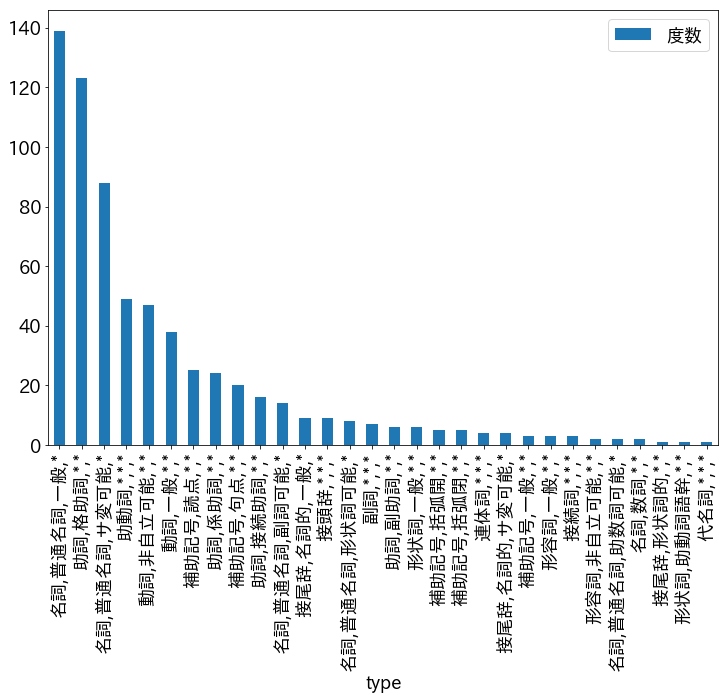

In [28]:
g_cnt = g_text2.groupby('type').count().iloc[:, :1].rename(columns={'surface':'度数'}).sort_values('度数', ascending=False)
g_cnt.plot.bar(figsize=(12,8))
plt.rcParams["font.size"] = 20

In [19]:
m_text2.groupby('type').count().iloc[:, :1].rename(columns={'surface':'度数'}).sort_values('度数', ascending=False)

,度数
type,
名詞-一般,108
名詞-サ変接続,64
助詞-格助詞-一般,59
動詞-自立,56
助詞-連体化,38
助動詞,35
記号-読点,25
助詞-係助詞,24
名詞-固有名詞-一般,22


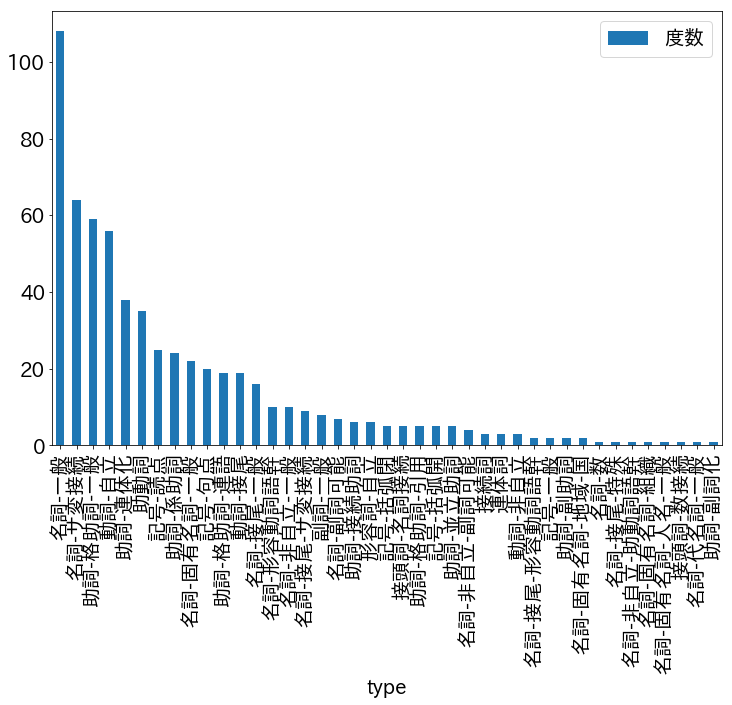

In [29]:
m_cnt = m_text2.groupby('type').count().iloc[:, :1].rename(columns={'surface':'度数'}).sort_values('度数', ascending=False)
m_cnt.plot.bar(figsize=(12,8))
plt.rcParams["font.size"] = 20

## 分かち書きした単語の頻度を確認

In [20]:
g_text2.groupby('surface').count().iloc[:, :1].rename(columns={'original':'度数'}).sort_values('度数', ascending=False)

,度数
surface,
の,41
主成分,33
に,30
、,25
を,23
は,23
。,20
で,15
と,14


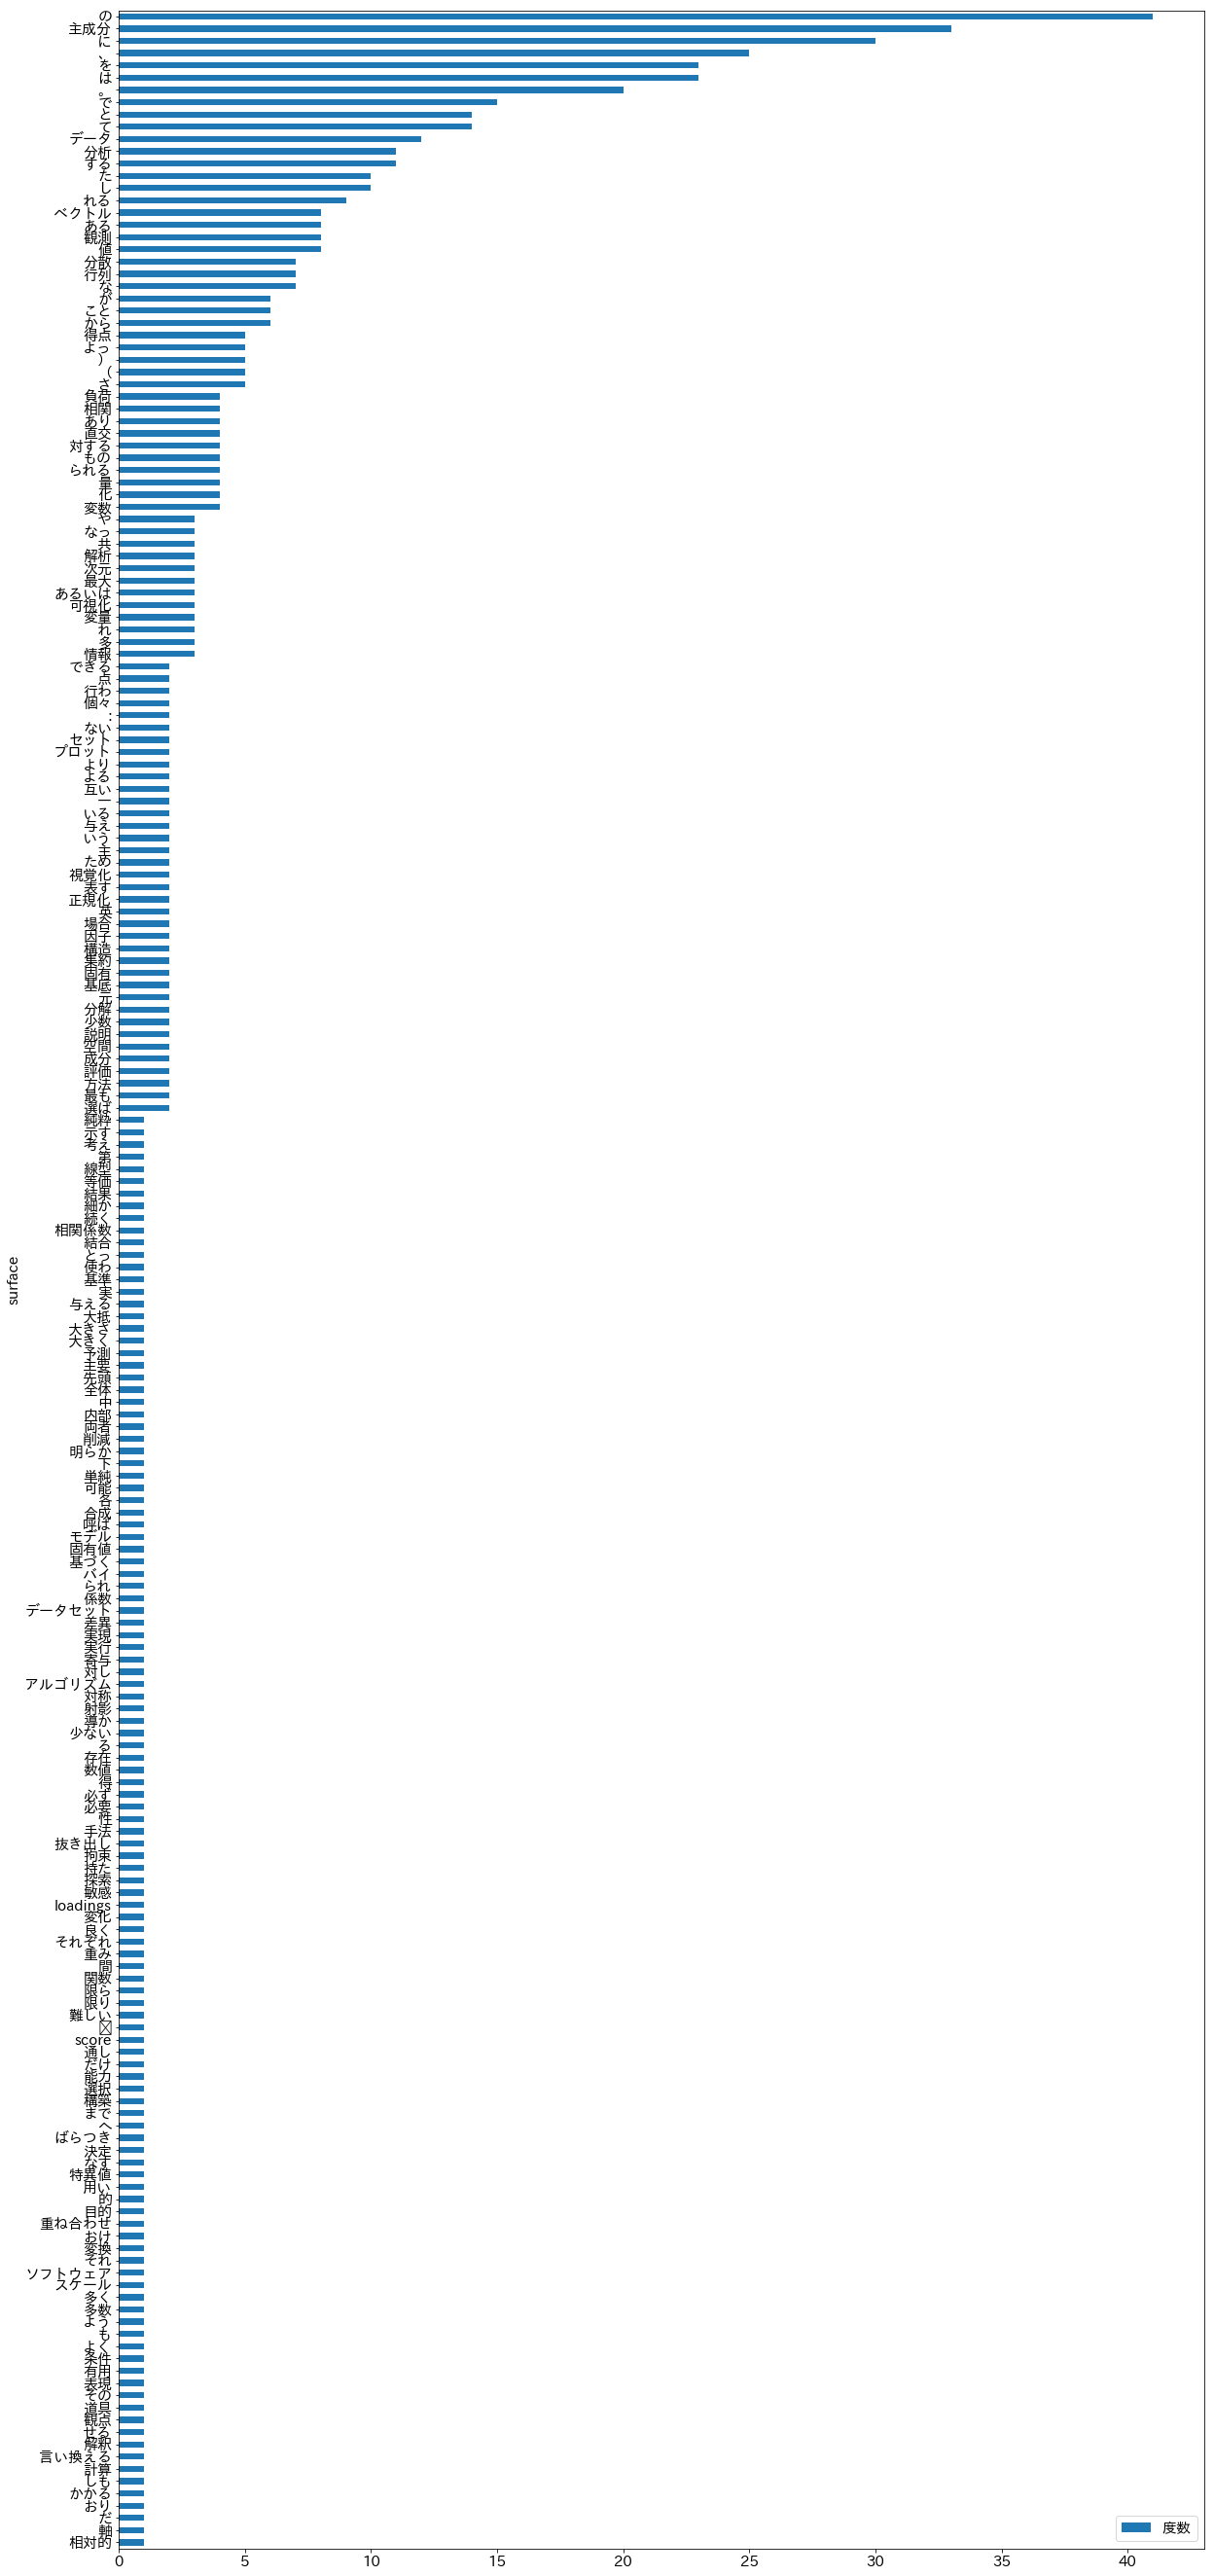

In [44]:
g_s_cnt = g_text2.groupby('surface').count().iloc[:, :1].rename(columns={'original':'度数'}).sort_values('度数', ascending=False)
g_s_cnt.sort_values('度数').plot.barh(figsize=(20,48))
plt.rcParams["font.size"] = 15

In [21]:
m_text2.groupby('surface').count().iloc[:, :1].rename(columns={'katakana':'度数'}).sort_values('度数', ascending=False)

,度数
surface,
の,41
、,25
主成分,24
は,23
を,22
。,20
で,15
に,14
する,11


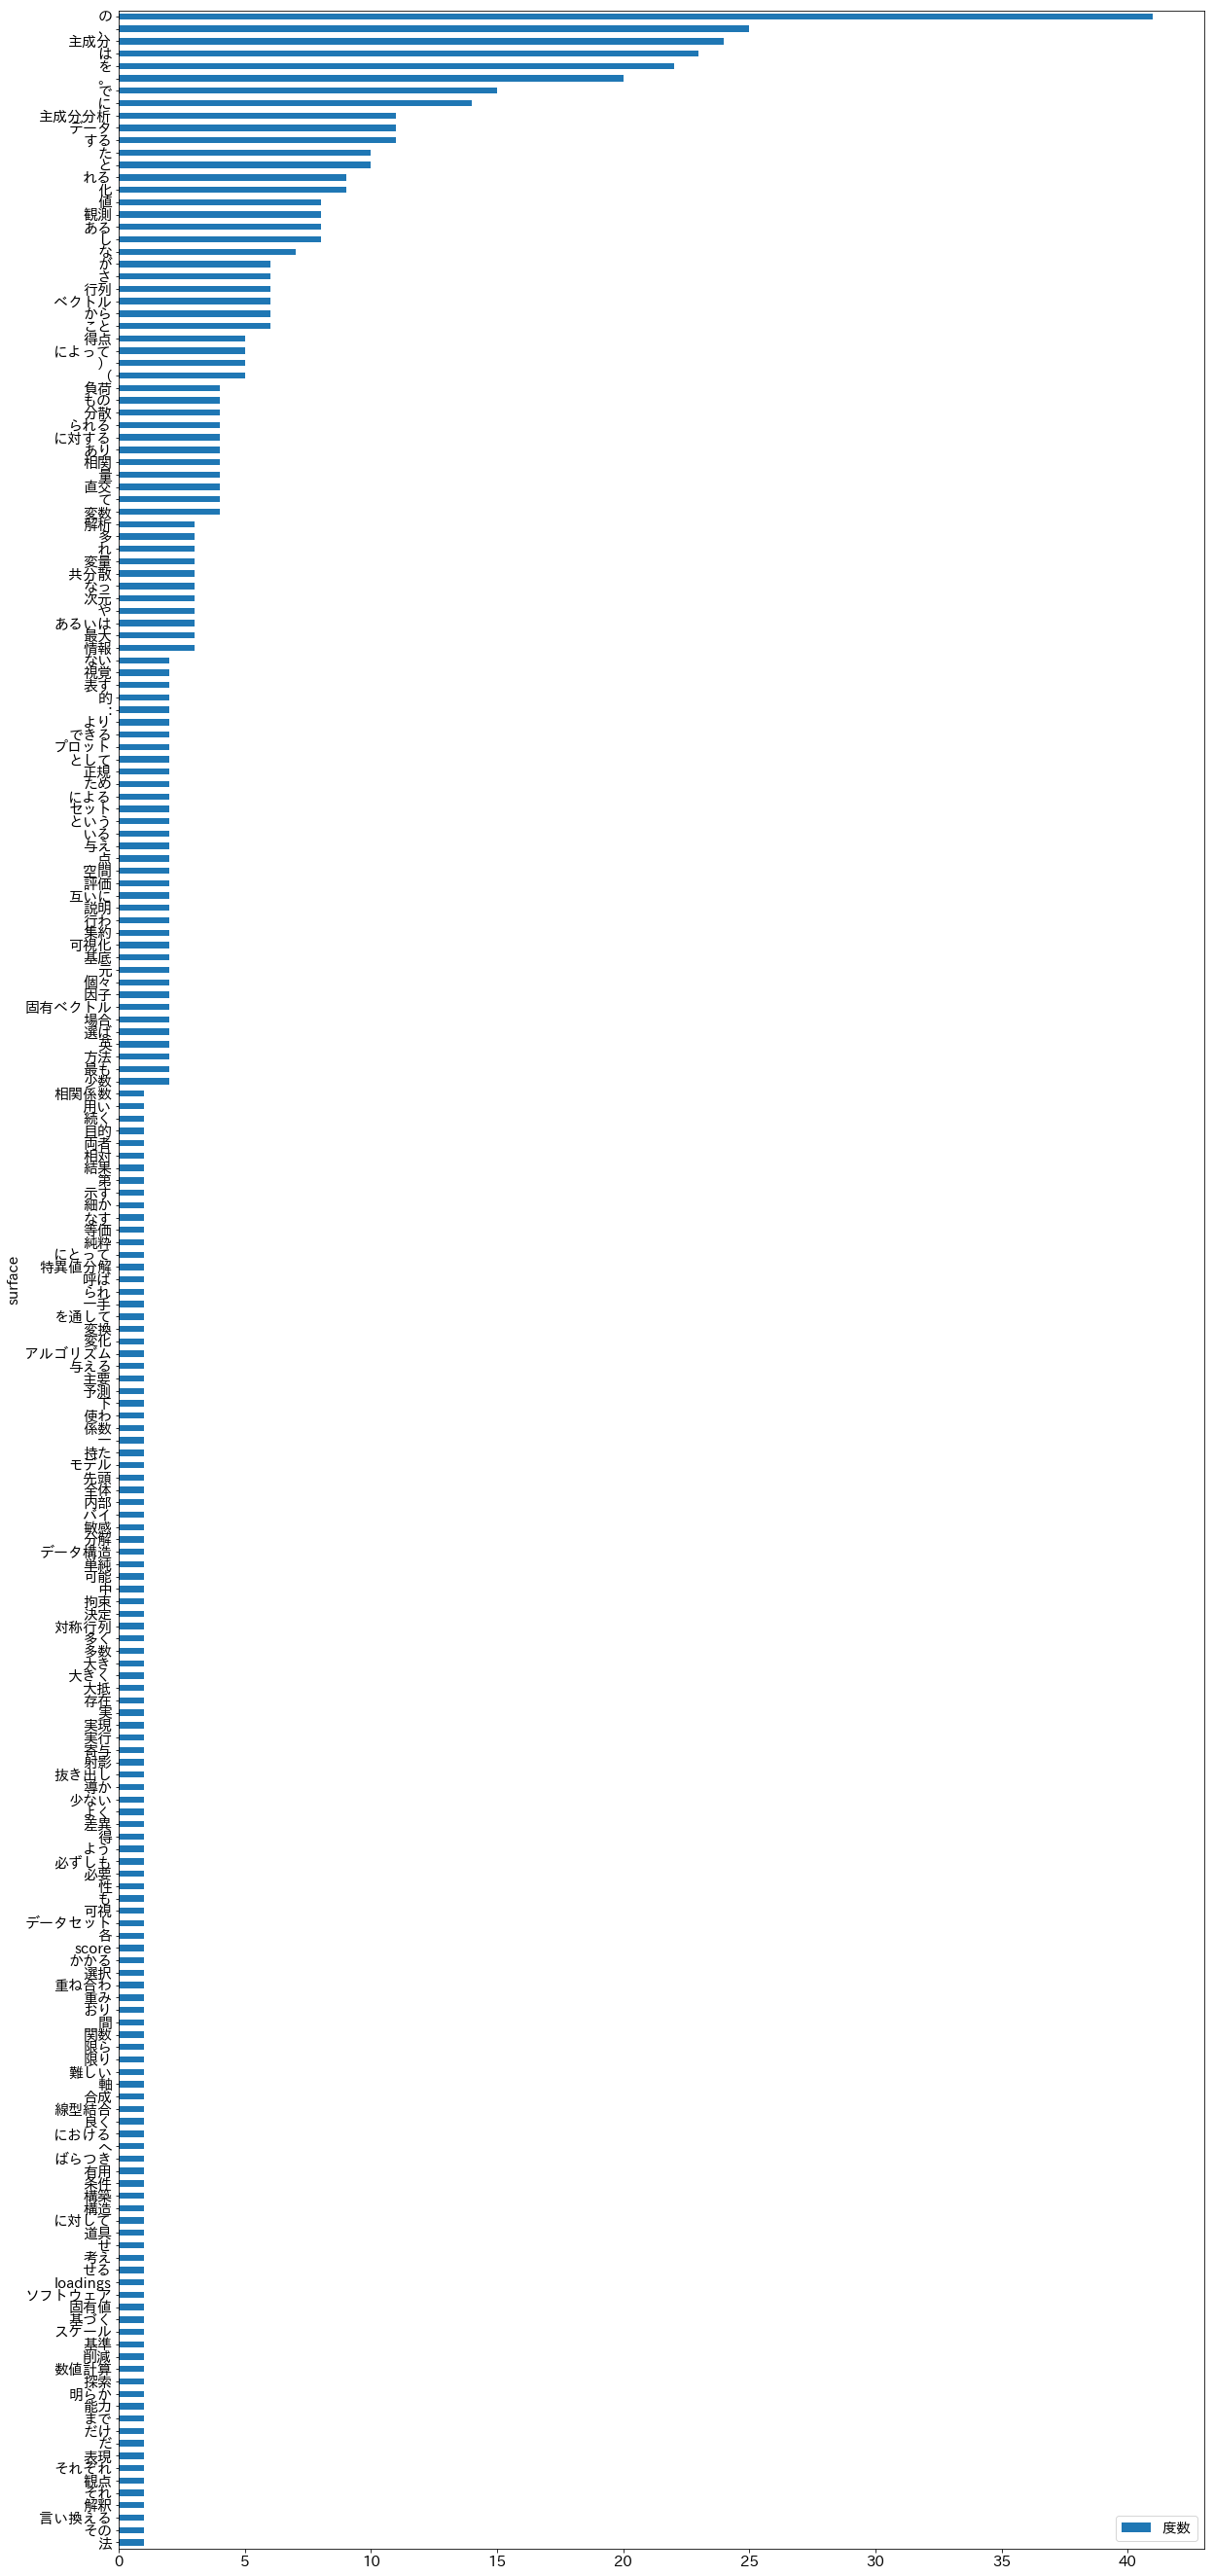

In [43]:
m_s_cnt = m_text2.groupby('surface').count().iloc[:, :1].rename(columns={'katakana':'度数'}).sort_values('度数', ascending=False)
m_s_cnt.sort_values('度数').plot.barh(figsize=(20,48))
plt.rcParams["font.size"] = 15

## 名詞のみ抽出

In [45]:
g_text3 = g_text2[g_text2['type'].str.contains('名詞')]

basic_check(g_text3)

行と列の長さ
(267, 3)
--------------------------------------------------
各カラムの欠損値の数
surface     0
original    0
type        0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 675
Data columns (total 3 columns):
surface     267 non-null object
original    267 non-null object
type        267 non-null object
dtypes: object(3)
memory usage: 8.3+ KB
None
--------------------------------------------------
各カラムのデータ型
surface     object
original    object
type        object
dtype: object


,surface,original,type
1,主成分,主成分,"名詞,普通名詞,一般,*"
2,分析,分析,"名詞,普通名詞,サ変可能,*"
4,相関,相関,"名詞,普通名詞,サ変可能,*"
7,多数,多数,"名詞,普通名詞,副詞可能,*"
9,変数,変数,"名詞,普通名詞,一般,*"


,surface,original,type
664,存在,存在,"名詞,普通名詞,サ変可能,*"
667,個々,個々,"名詞,普通名詞,一般,*"
669,方法,方法,"名詞,普通名詞,一般,*"
673,互い,互い,"名詞,普通名詞,一般,*"
675,等価,等価,"名詞,普通名詞,形状詞可能,*"


In [46]:
m_text3 = m_text2[m_text2['type'].str.contains('名詞')]

basic_check(m_text3)

行と列の長さ
(265, 6)
--------------------------------------------------
各カラムの欠損値の数
surface           0
katakana          0
original          0
type              0
katsuyoukei     265
katsuyoukata    265
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 1 to 608
Data columns (total 6 columns):
surface         265 non-null object
katakana        265 non-null object
original        265 non-null object
type            265 non-null object
katsuyoukei     0 non-null object
katsuyoukata    0 non-null object
dtypes: object(6)
memory usage: 14.5+ KB
None
--------------------------------------------------
各カラムのデータ型
surface         object
katakana        object
original        object
type            object
katsuyoukei     object
katsuyoukata    object
dtype: object


,surface,katakana,original,type,katsuyoukei,katsuyoukata
1,主成分分析,シュセイブンブンセキ,主成分分析,名詞-固有名詞-一般,NaN,NaN
3,相関,ソウカン,相関,名詞-サ変接続,NaN,NaN
6,多数,タスウ,多数,名詞-副詞可能,NaN,NaN
8,変数,ヘンスウ,変数,名詞-一般,NaN,NaN
10,相関,ソウカン,相関,名詞-サ変接続,NaN,NaN


,surface,katakana,original,type,katsuyoukei,katsuyoukata
597,差異,サイ,差異,名詞-一般,NaN,NaN
599,存在,ソンザイ,存在,名詞-サ変接続,NaN,NaN
602,個々,ココ,個々,名詞-一般,NaN,NaN
604,方法,ホウホウ,方法,名詞-一般,NaN,NaN
608,等価,トウカ,等価,名詞-形容動詞語幹,NaN,NaN


In [48]:
g_text3.groupby('surface').count().iloc[:, :1].rename(columns={'original':'度数'}).sort_values('度数', ascending=False)

,度数
surface,
主成分,33
データ,12
分析,11
観測,8
値,8
ベクトル,8
分散,7
行列,7
こと,6


In [49]:
m_text3.groupby('surface').count().iloc[:, :1].rename(columns={'katakana':'度数'}).sort_values('度数', ascending=False)

,度数
surface,
主成分,24
データ,11
主成分分析,11
化,9
値,8
観測,8
行列,6
こと,6
ベクトル,6


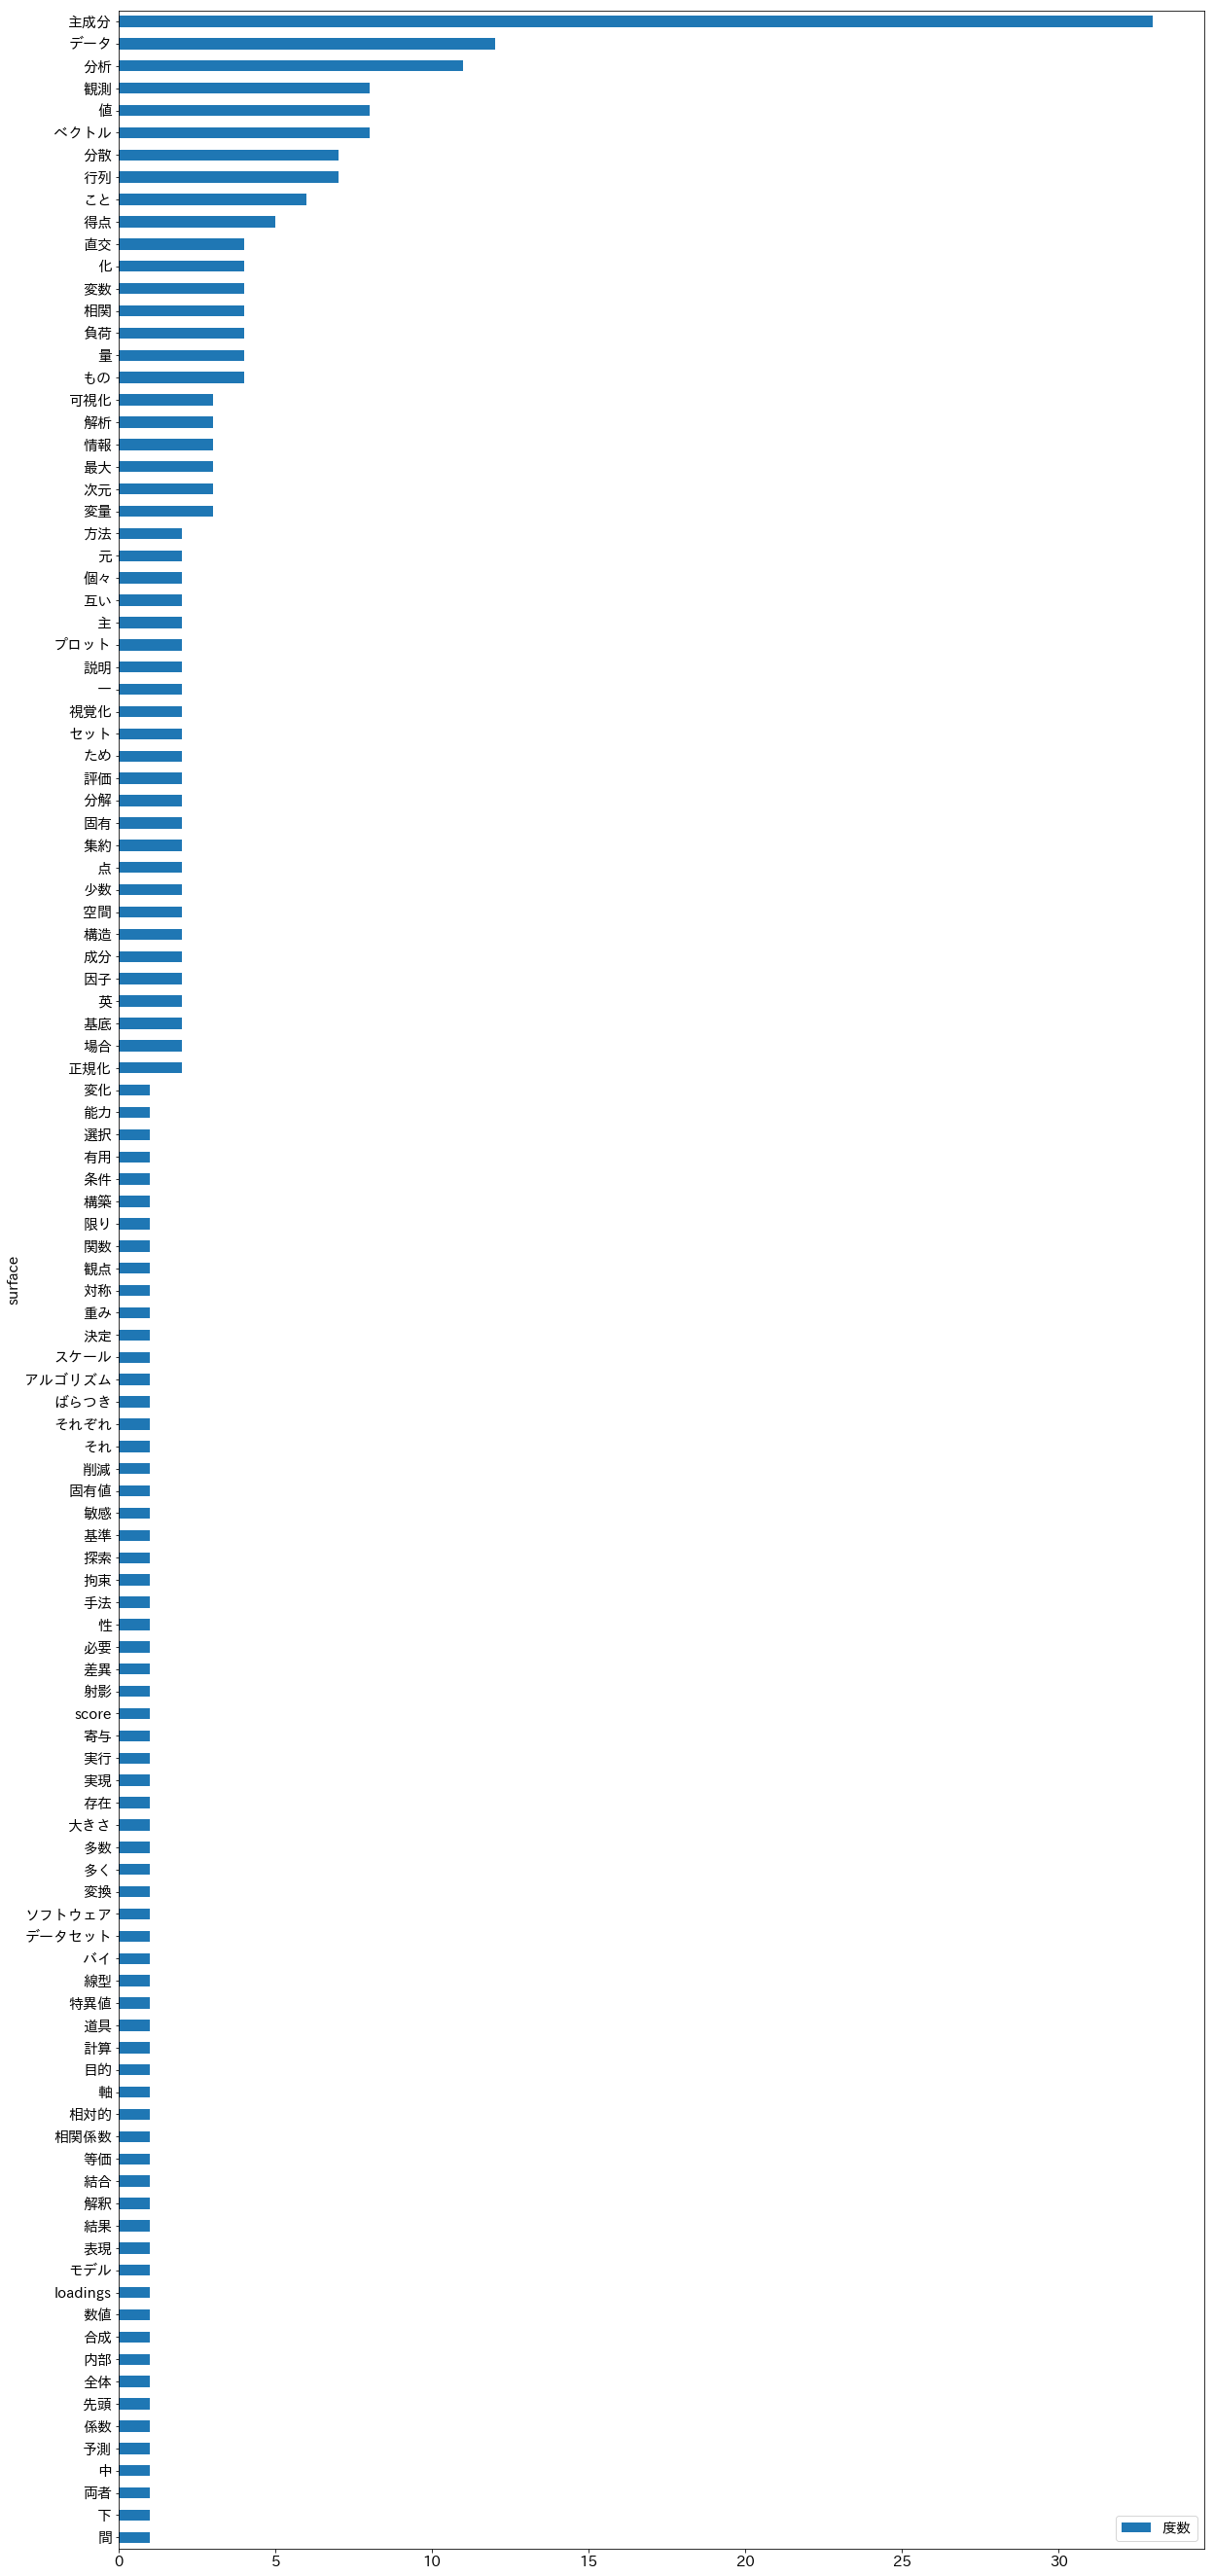

In [53]:
g_cnt3 = g_text3.groupby('surface').count().iloc[:, :1].rename(columns={'original':'度数'}).sort_values('度数', ascending=False)
g_cnt3.sort_values('度数').plot.barh(figsize=(20,48))
#g_cnt3.plot.barh(figsize=(12,8))
plt.rcParams["font.size"] = 15

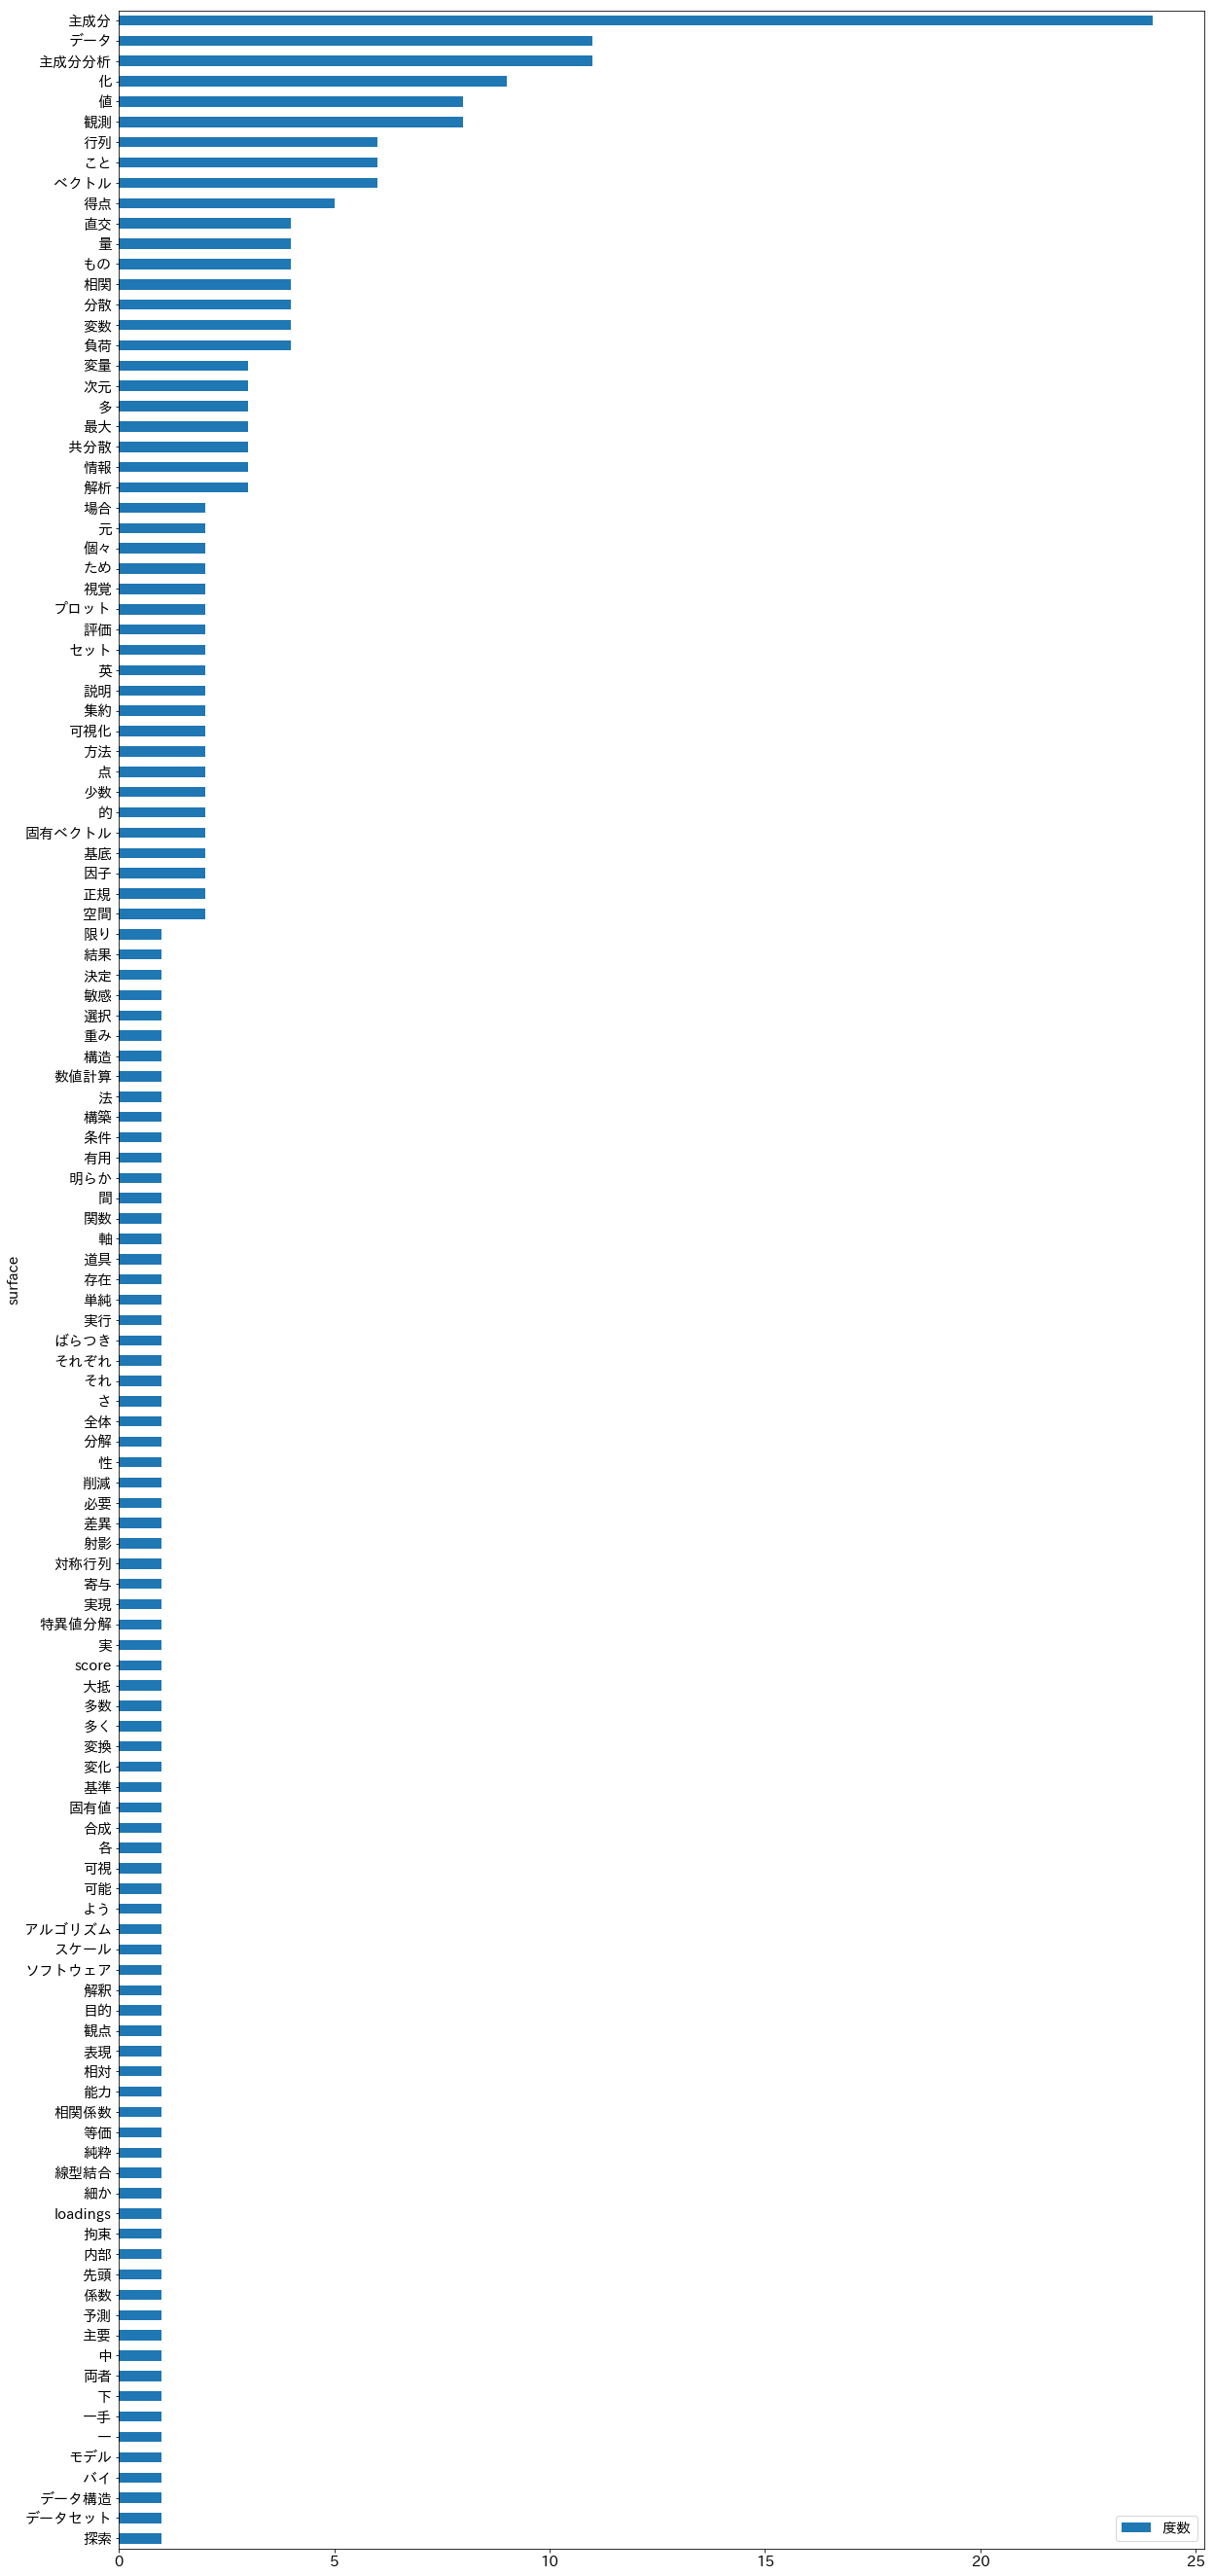

In [54]:
m_cnt3 = m_text3.groupby('surface').count().iloc[:, :1].rename(columns={'katakana':'度数'}).sort_values('度数', ascending=False)
m_cnt3.sort_values('度数').plot.barh(figsize=(20,48))
#g_cnt3.plot.barh(figsize=(12,8))
plt.rcParams["font.size"] = 15

## GiNZAとMeCab×neologdnで抽出された名詞のデータフレームを連結

In [59]:
g_cnt4 = g_cnt3.reset_index().rename(columns=lambda x: str(x)+'_ginza')

m_cnt4 = m_cnt3.reset_index().rename(columns=lambda x: str(x)+'_mecab')

display(g_cnt4.head(), m_cnt4.head())

,surface_ginza,度数_ginza
0,主成分,33
1,データ,12
2,分析,11
3,観測,8
4,値,8


,surface_mecab,度数_mecab
0,主成分,24
1,データ,11
2,主成分分析,11
3,化,9
4,値,8


In [65]:
join_join_ = g_cnt4.join(m_cnt4, how='outer')
join_df['度数_ginza'] = join_df['度数_ginza'].apply(lambda x:str(round(float(x))) if str(x).replace('.', '').isdecimal() else '-')
join_df

,surface_ginza,度数_ginza,surface_mecab,度数_mecab
0,主成分,33,主成分,24
1,データ,12,データ,11
2,分析,11,主成分分析,11
3,観測,8,化,9
4,値,8,値,8
5,ベクトル,8,観測,8
6,分散,7,行列,6
7,行列,7,こと,6
8,こと,6,ベクトル,6
9,得点,5,得点,5


In [66]:
join_df.to_excel('GiNZAとMeCabの比較_形態素解析された名詞とその頻度.xlsx', index=False)